# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)



### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# Create the city DataFrame
#urban_cities_df =pyber_data_df[pyber_data_df["type"]=="Urban"]
#suburban_cities_df =pyber_data_df[pyber_data_df["type"]=="Suburban"]
#rural_cities_df =pyber_data_df[pyber_data_df["type"]=="Rural"]

In [4]:
# Create the city DataFrame
#urban_citiesdrivers_df =city_data_df[city_data_df["type"]=="Urban"]
#suburban_citiesdrivers_df =city_data_df[city_data_df["type"]=="Suburban"]
#rural_citiesdrivers_df =city_data_df[city_data_df["type"]=="Rural"]

In [5]:
#  1. Get the total rides for each city type
#urban_ride_count = ((urban_cities_df. groupby(["city"]).count()["ride_id"]).sum())
#suburban_ride_count = ((suburban_cities_df.groupby(["city"]).count()["ride_id"]).sum())
#rural_ride_count = ((rural_cities_df.groupby(["city"]).count()["ride_id"]).sum())

In [6]:
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [7]:
#rural_ride_count.sum()


In [8]:
# 2. Get the total drivers for each city type
#urban_driver_sum = ((urban_citiesdrivers_df .groupby(["city"]).sum()["driver_count"]).sum())
#suburban_driver_sum = ((suburban_citiesdrivers_df.groupby(["city"]).sum()["driver_count"]).sum())
#rural_driver_sum = ((rural_citiesdrivers_df.groupby(["city"]).sum()["driver_count"]).sum())


In [9]:
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]

In [10]:
#urban_driver_sum.sum()

In [11]:
#  3. Get the total amount of fares for each city type
#urban_fare_sum = ((urban_cities_df.groupby(["city"]).sum()["fare"]).sum())
#suburban_fare_sum = ((suburban_cities_df.groupby(["city"]).sum()["fare"]).sum())
#rural_fare_sum = ((rural_cities_df.groupby(["city"]).sum()["fare"]).sum())

In [12]:
fare_sum = pyber_data_df.groupby(["type"]).sum()["fare"]

In [13]:
#urban_fare_sum.sum()

In [14]:
#  4. Get the average fare per ride for each city type. 
#urban_avg_fare = (urban_fare_sum.sum()/urban_ride_count.sum())
#suburban_avg_fare = (suburban_fare_sum.sum()/suburban_ride_count.sum())
#rural_avg_fare = (rural_fare_sum.sum()/rural_ride_count.sum())

In [15]:
avg_fare = (fare_sum/ride_count)

In [16]:
#urban_avg_fare

In [17]:
# 5. Get the average fare per driver for each city type. 
#urban_avg_fare_per_driver =(urban_fare_sum/urban_driver_sum)
#suburban_avg_fare_per_driver =(suburban_fare_sum/suburban_driver_sum)
#rural_avg_fare_per_driver =(rural_fare_sum/rural_driver_sum)

In [18]:
avg_fare_per_driver = (fare_sum/driver_count)

In [19]:
#urban_avg_fare_per_driver.sum()

In [20]:
#  6. Create a PyBer summary DataFrame. 
pyber_type = pyber_data_df.set_index(["type"])
pyber_summary_df= pd.DataFrame(
          {"Total Rides": ride_count, 
          "Total Drivers": driver_count,
          "Total Fares": fare_sum ,
          "Average Fare per Ride": avg_fare,
          "Average Fare per Driver": avg_fare_per_driver})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [21]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [22]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Driver"]= pyber_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)

In [23]:
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [24]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [25]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_date_fare_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
pyber_date_fare_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [26]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_date_fare_df = pyber_date_fare_df.reset_index()

In [27]:
type(pyber_date_fare_df)

pandas.core.frame.DataFrame

In [28]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_df = pyber_date_fare_df.pivot(index="date", columns ="type", values ="fare")
pyber_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [29]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_date2_df = pyber_pivot_df.loc['2019-01-01':'2019-04-29']

In [30]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_date2_df.index = pd.to_datetime(pyber_date2_df.index)

In [31]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_date2_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [35]:
pyber_date2_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [39]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_weekly_df = pyber_date2_df.resample('W').count()


In [40]:
pyber_weekly_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,5,22,66
2019-01-13,3,35,80
2019-01-20,8,41,84
2019-01-27,6,34,84
2019-02-03,9,32,88


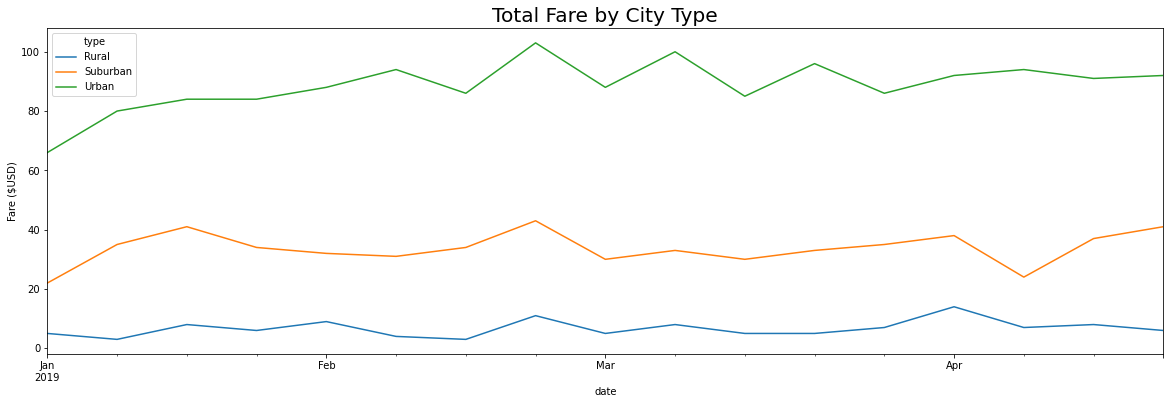

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [41]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
pyber_weekly = pyber_weekly_df.plot(figsize = (20,6))

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
pyber_weekly.set_title("Total Fare by City Type")
pyber_weekly.set_ylabel("Fare ($USD)")


plt.show()
plt.tight_layout